# Example to connect to postgres

This is a tutorial to connect to our PostgreSQL database using python.

First you need to install the following libraries:
- psycopg2
- python-dotenv

Then you need to create a file with the name ".env". This file will contain the connection information and your credentials. This is an example:

```
DB_HOST=host_name
DB_NAME=postgres
DB_USER=my_user
DB_PASSWORD=my_password
DB_PORT=5432
```

After that you´re all set. We will import your credentials and connect to the database.

In [6]:
import os
import psycopg2 # PostgreSQL database adapter for Python
from dotenv import load_dotenv # Reads the key-value pair from .env file and adds them to environment variable

# Load environment variables from .env file
load_dotenv()

# Accessing credentials
db_host = os.getenv("DB_HOST")
db_name = os.getenv("DB_NAME")
db_user = os.getenv("DB_USER")
db_password = os.getenv("DB_PASSWORD")
db_port = os.getenv("DB_PORT")

In [7]:
# Connect to the database
conn = psycopg2.connect(
    host=db_host,
    dbname=db_name,
    user=db_user,
    password=db_password,
    port=db_port
)

Now we can query our data (write sql code) and store it as a pandas dataframe

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
query_main="""
    select * 
    from agg.t_msb1m
    where year = 2019 and month = 7 and day =12
"""
df_main = pd.read_sql_query(query_main, conn)


C:\Users\Zóra\AppData\Local\Temp\ipykernel_26024\4255102649.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_main = pd.read_sql_query(query_main, conn)


In [7]:
df_main.head()

,site,year,month,day,hour,min,tz,soc,discharge_wh,charge_wh,...,gridexport_wh,gridimport_wh,pvcharge_wh,pvcons_wh,pvexport_wh,griddischarge_wh,gridcharge_wh,gridcons_wh,consdischarge_wh,mismatch_wh
0,85,2019,7,12,0,0,UTC+01:00,22.0,110.55,0.0,...,0.0,7.06,0.0,0.00,0.0,0.0,0.0,7.06,110.55,0.0
1,85,2019,7,12,0,15,UTC+01:00,19.0,97.08,0.0,...,0.0,5.87,0.0,0.03,0.0,0.0,0.0,5.87,97.08,0.0
2,85,2019,7,12,0,30,UTC+01:00,18.0,62.21,0.0,...,0.0,7.72,0.0,0.00,0.0,0.0,0.0,7.72,62.21,0.0
3,85,2019,7,12,0,45,UTC+01:00,16.0,88.40,0.0,...,0.0,6.84,0.0,0.00,0.0,0.0,0.0,6.84,88.40,0.0
4,85,2019,7,12,1,0,UTC+01:00,15.0,58.99,0.0,...,0.0,6.43,0.0,0.00,0.0,0.0,0.0,6.43,58.99,0.0


In [8]:
query_test = "SELECT schema_name FROM information_schema.schemata;"
pd.read_sql_query(query_test, conn)

C:\Users\Zóra\AppData\Local\Temp\ipykernel_26024\881334992.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql_query(query_test, conn)


,schema_name
0,information_schema
1,pg_catalog
2,public
3,agg
4,raw


In [9]:
query = "SELECT table_name FROM information_schema.tables WHERE table_schema = 'public';"
tables = pd.read_sql_query(query, conn)
query = "SELECT table_name FROM information_schema.tables WHERE table_schema != 'information_schema' AND table_schema != 'pg_catalog';"
tables = pd.read_sql_query(query, conn)
tables


C:\Users\Zóra\AppData\Local\Temp\ipykernel_26024\3831488728.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  tables = pd.read_sql_query(query, conn)
C:\Users\Zóra\AppData\Local\Temp\ipykernel_26024\3831488728.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  tables = pd.read_sql_query(query, conn)


,table_name
0,test
1,t_weather
2,t_msb1m
3,t_meta_data
4,t_prodcon_forecast
5,t_meta_data_wide_format
6,t_msb1m
7,t_ims1m


In [10]:
query_tables = """
    select * 
    from information_schema.tables
"""

df_tables = pd.read_sql_query(query_tables, conn)
df_tables

C:\Users\Zóra\AppData\Local\Temp\ipykernel_26024\2854781601.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_tables = pd.read_sql_query(query_tables, conn)


,table_catalog,table_schema,table_name,table_type,self_referencing_column_name,reference_generation,user_defined_type_catalog,user_defined_type_schema,user_defined_type_name,is_insertable_into,is_typed,commit_action
0,postgres,raw,test,BASE TABLE,None,None,None,None,None,YES,NO,None
1,postgres,pg_catalog,pg_type,BASE TABLE,None,None,None,None,None,YES,NO,None
2,postgres,agg,t_weather,BASE TABLE,None,None,None,None,None,YES,NO,None
3,postgres,agg,t_msb1m,BASE TABLE,None,None,None,None,None,YES,NO,None
4,postgres,pg_catalog,pg_foreign_table,BASE TABLE,None,None,None,None,None,YES,NO,None
...,...,...,...,...,...,...,...,...,...,...,...,...
192,postgres,information_schema,foreign_tables,VIEW,None,None,None,None,None,NO,NO,None
193,postgres,information_schema,foreign_server_options,VIEW,None,None,None,None,None,NO,NO,None
194,postgres,information_schema,user_mapping_options,VIEW,None,None,None,None,None,NO,NO,None
195,postgres,information_schema,user_mappings,VIEW,None,None,None,None,None,NO,NO,None


In [11]:
pd.set_option('display.max_columns', None)

Calling t_meta_data_wide_format table

In [12]:
query_meta = """
    select * 
    from agg.t_meta_data_wide_format
"""

df_meta = pd.read_sql_query(query_meta, conn)
df_meta

C:\Users\Zóra\AppData\Local\Temp\ipykernel_26024\3001398367.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_meta = pd.read_sql_query(query_meta, conn)


,newsite,postcode_x,responsible_person,payment_method,avg_monthly_electricity_bill,electricity_bills_shared,current_supplier,installed_smart_meter,no_resident_adults_16_plus,no_resident_adults_over_65,no_resident_children_under_16,weekday_morning_evening,someone_home_all_day,continuous_electricity_supply,household_annual_income,property_type,approx_year_of_build,property_in_conservation_area,conservation_area_details,property_heat_source,economy7_off_peak_meter,economy7_storage_heaters,no_of_storage_heaters,renewable_technology_installed,renewable_source_1,renewable_source_2,renewable_source_3,renewable_source_4,renewable_source_5,renewable_source_6,renewables_installed_g83_g59,reason_for_renewable_technology,electrical_appliances_home,electrical_appliances_home_1,electrical_appliances_home_2,electrical_appliances_home_3,electrical_appliances_home_4,electrical_appliances_home_5,electrical_appliances_home_6,electrical_appliances_home_7,electrical_appliances_home_8,electrical_appliances_home_9,electrical_appliances_home_10,electrical_appliances_home_11,electrical_appliances_home_12,electrical_appliances_home_13,electrical_appliances_home_14,electrical_appliances_home_15,electrical_appliances_home_16,electrical_appliances_home_17,electrical_appliances_home_18,electric_vehicle_owned,ev_vehicle_make,main_uses_ev_1,main_uses_ev_2,main_uses_ev_3,approx_no_of_trips_per_day,approx_no_of_trips_per_week,average_weekly_mileage_ev,dedicated_ev_charger,fuse_box_location,broadband_always_on,broadband_download_speed,broadband_upload_speed,router_has_ethernet_sockets,no_of_ethernet_sockets,powerline_ethernet_adapters,powerline_ethernet_adapters_1,roof_direction,roof_shaded,pitched_roof,property_has_garage,garage_dimensions_for_battery,no_garage_battery_dimensions,motivations_for_participating_1,motivations_for_participating_2,motivations_for_participating_3,motivations_for_participating_4,motivations_for_participating_5,motivations_for_participating_6,postcode_y,dwelling_type_1,dwelling_type_2,floor_area,walls,roof,glazing,heating_type,heating_fuel,controls,hot_water,site,besstype,besskwh,besskw,pvkw,postcode,majorload
0,1,TR13,Yes,Direct debit,40.0,Yes,British Gas,No,2,1.0,0.0,Often,Often,No,"45,001 - 70,000",Bungalow,1945-1980,No,None,Mains gas,None,None,NaN,Yes,Solar PV,None,None,None,None,None,Don't know,To reduce my monthly / annual electric bill,Fridge,Freezer,Microwave,None,Toaster,Kettle,Dishwasher,Washing Machine,TV,None,None,None,PC / Laptop,Tablet,Smart Phone,Hair Dryer,None,Vaccuum,fish tank and pond pump,No,None,None,None,None,NaN,NaN,NaN,None,garage,Yes,51.6,34.70,No,NaN,No,NaN,None,None,None,Yes,Yes,None,5.0,4.0,2.0,3.0,6.0,1.0,TR13,detached,bungalow,84.0,system built,250,double,boiler,mains gas,Programmer RT & TRV,main system,1,Eco9.43,5.0,2.5,1.900,TR13,Shower
1,2,PL27,Yes,Direct debit,30.0,Yes,EON,No,2,2.0,0.0,No,Often,No,"16,000 - 25,000",Detached,1945-1980,No,None,Mains gas,No,No,0.0,Yes,Solar PV,None,None,None,None,None,Don't know,To reduce my monthly / annual electric bill,Fridge,Freezer,Microwave,Oven,Toaster,Kettle,None,Washing Machine,TV,None,None,None,PC / Laptop,Tablet,Smart Phone,Hair Dryer,None,Vaccuum,None,No,None,None,None,None,NaN,NaN,NaN,None,Kitchen,Yes,9.77,0.86,Yes,3.0,Yes,2.0,North to South,No,Yes,Yes,Yes,Yes,5.0,6.0,3.0,2.0,4.0,1.0,PL27,semi-detached,house,105.0,cavity wall filled,200,double,boiler,mains gas,programmer & TRV & bypass,main system,2,Eco9.43,5.0,2.5,2.000,PL27,None
2,3,PL30,Yes,Direct debit,65.0,Yes,EDF,No,5+,0.0,0.0,Rarely,Yes,No,"16,000 - 25,000",Detached,Pre-1945,Yes,aonb,None,None,None,NaN,Yes,Solar PV,Solar Thermal,None,None,None,None,Don't know,To be greener / reduce my carbon emissions (en...,Fridge,Freezer,Microwave,Oven,Toaster,Kettle,None,Washing Machine,TV,None,None,Stereo,PC / Laptop,Tablet,None,Hair Dryer,Hair Straighteners,Vaccuum,None,No,None,None,None,None,NaN,NaN,NaN,None,kitchen,Yes,None,NaN,Yes,NaN,No,NaN,None,None,None,Yes,Yes,None,6.0,3.0,5.0,2.0,4.0,1.0,PL30,detached,hou

Number of Properties by Property Type and Year of Build

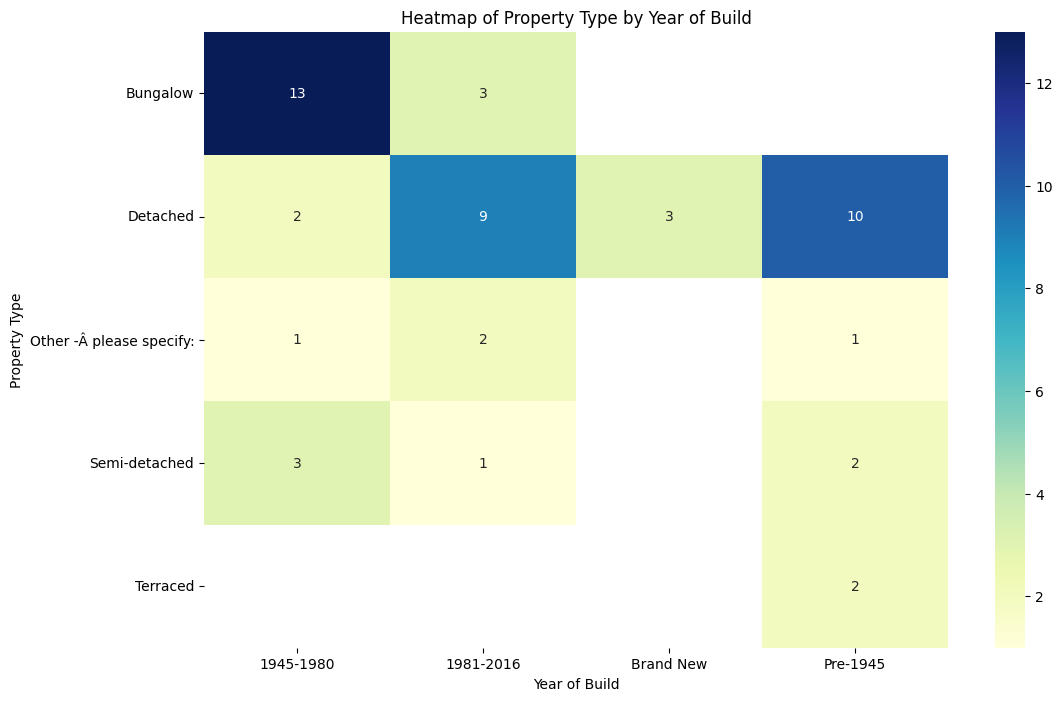

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

heatmap_data = df_meta.pivot_table(index='property_type', columns='approx_year_of_build', values='newsite', aggfunc='count')

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='g')
plt.title('Heatmap of Property Type by Year of Build')
plt.xlabel('Year of Build')
plt.ylabel('Property Type')
plt.show()


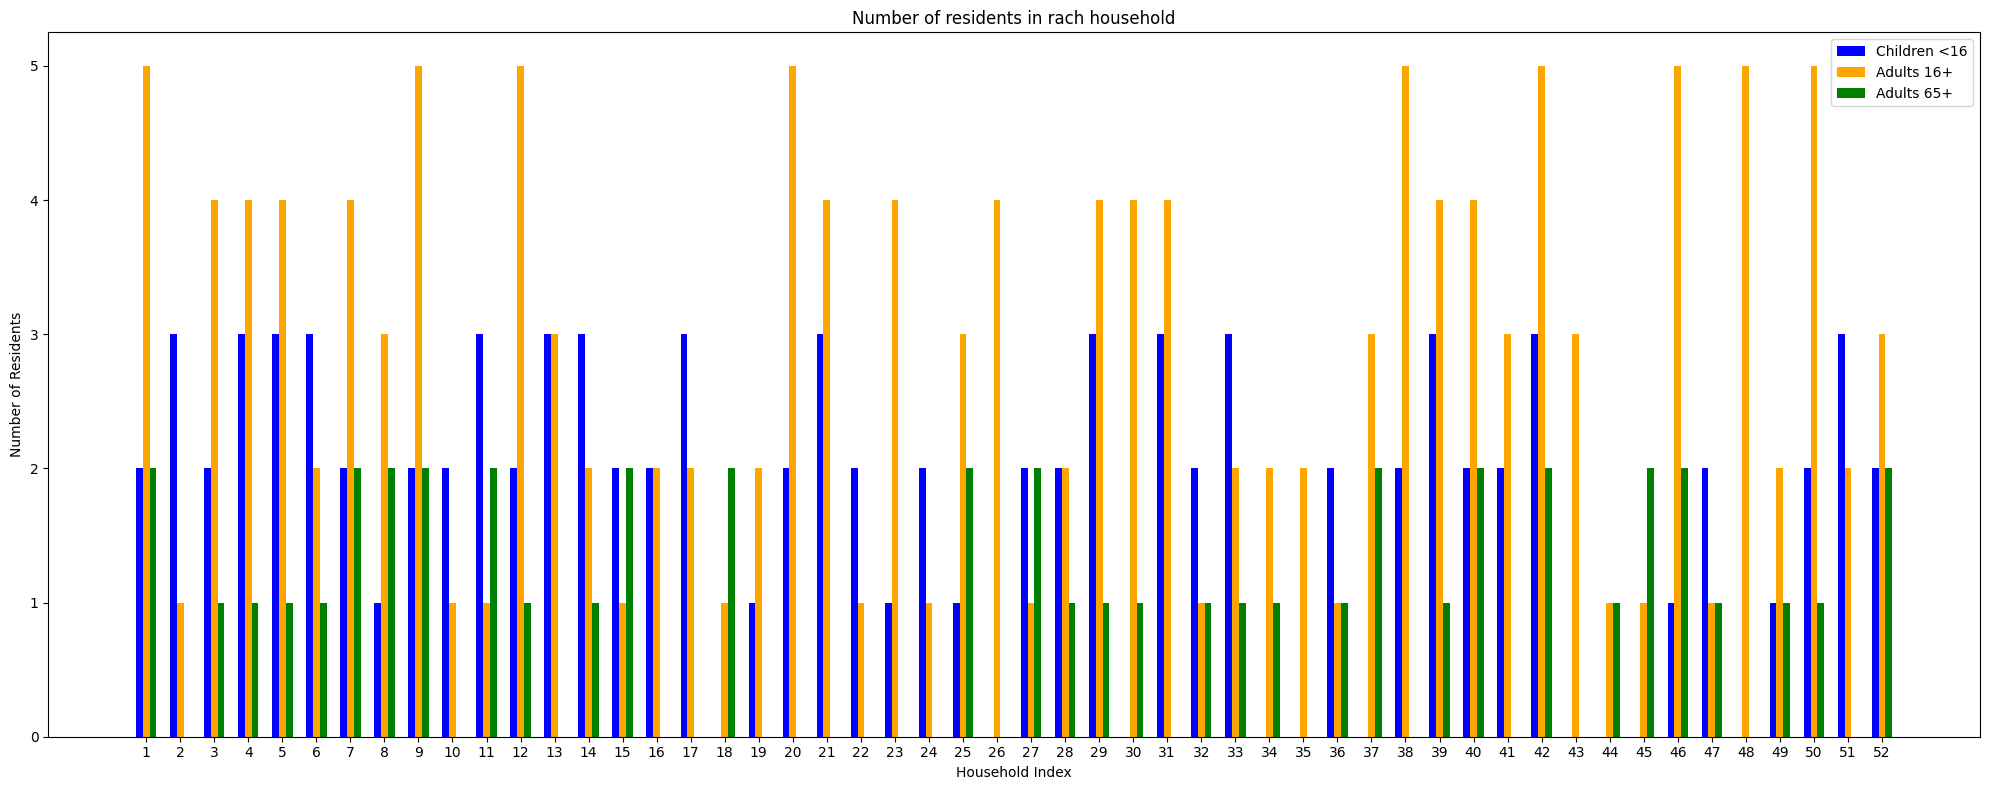

In [14]:
import numpy as np

np.random.seed(0)  # For reproducibility
sample_data = {
    'no_resident_adults_16_plus': np.random.randint(1, 6, size=52),
    'no_resident_adults_over_65': np.random.randint(0, 3, size=52),
    'no_resident_children_under_16': np.random.randint(0, 4, size=52),
}

df = pd.DataFrame(sample_data)

num_groups = len(df)

fig, ax = plt.subplots(figsize=(20, 8))

# Define the X axis and the width of the bars
indices = np.arange(num_groups)
bar_width = 0.2

# Plot each category
ax.bar(indices, df['no_resident_children_under_16'], bar_width, label='Children <16', color='blue')
ax.bar(indices + bar_width, df['no_resident_adults_16_plus'], bar_width, label='Adults 16+', color='orange')
ax.bar(indices + 2 * bar_width, df['no_resident_adults_over_65'], bar_width, label='Adults 65+', color='green')

# Set the title and labels
ax.set_title('Number of residents in rach household')
ax.set_xlabel('Household Index')
ax.set_ylabel('Number of Residents')
ax.set_xticks(indices + bar_width)
ax.set_xticklabels(np.arange(1, num_groups + 1))

# Add a legend
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()

In [15]:
df_meta.rename(columns={'newsite': 'site'})
df_meta

,newsite,postcode_x,responsible_person,payment_method,avg_monthly_electricity_bill,electricity_bills_shared,current_supplier,installed_smart_meter,no_resident_adults_16_plus,no_resident_adults_over_65,no_resident_children_under_16,weekday_morning_evening,someone_home_all_day,continuous_electricity_supply,household_annual_income,property_type,approx_year_of_build,property_in_conservation_area,conservation_area_details,property_heat_source,economy7_off_peak_meter,economy7_storage_heaters,no_of_storage_heaters,renewable_technology_installed,renewable_source_1,renewable_source_2,renewable_source_3,renewable_source_4,renewable_source_5,renewable_source_6,renewables_installed_g83_g59,reason_for_renewable_technology,electrical_appliances_home,electrical_appliances_home_1,electrical_appliances_home_2,electrical_appliances_home_3,electrical_appliances_home_4,electrical_appliances_home_5,electrical_appliances_home_6,electrical_appliances_home_7,electrical_appliances_home_8,electrical_appliances_home_9,electrical_appliances_home_10,electrical_appliances_home_11,electrical_appliances_home_12,electrical_appliances_home_13,electrical_appliances_home_14,electrical_appliances_home_15,electrical_appliances_home_16,electrical_appliances_home_17,electrical_appliances_home_18,electric_vehicle_owned,ev_vehicle_make,main_uses_ev_1,main_uses_ev_2,main_uses_ev_3,approx_no_of_trips_per_day,approx_no_of_trips_per_week,average_weekly_mileage_ev,dedicated_ev_charger,fuse_box_location,broadband_always_on,broadband_download_speed,broadband_upload_speed,router_has_ethernet_sockets,no_of_ethernet_sockets,powerline_ethernet_adapters,powerline_ethernet_adapters_1,roof_direction,roof_shaded,pitched_roof,property_has_garage,garage_dimensions_for_battery,no_garage_battery_dimensions,motivations_for_participating_1,motivations_for_participating_2,motivations_for_participating_3,motivations_for_participating_4,motivations_for_participating_5,motivations_for_participating_6,postcode_y,dwelling_type_1,dwelling_type_2,floor_area,walls,roof,glazing,heating_type,heating_fuel,controls,hot_water,site,besstype,besskwh,besskw,pvkw,postcode,majorload
0,1,TR13,Yes,Direct debit,40.0,Yes,British Gas,No,2,1.0,0.0,Often,Often,No,"45,001 - 70,000",Bungalow,1945-1980,No,None,Mains gas,None,None,NaN,Yes,Solar PV,None,None,None,None,None,Don't know,To reduce my monthly / annual electric bill,Fridge,Freezer,Microwave,None,Toaster,Kettle,Dishwasher,Washing Machine,TV,None,None,None,PC / Laptop,Tablet,Smart Phone,Hair Dryer,None,Vaccuum,fish tank and pond pump,No,None,None,None,None,NaN,NaN,NaN,None,garage,Yes,51.6,34.70,No,NaN,No,NaN,None,None,None,Yes,Yes,None,5.0,4.0,2.0,3.0,6.0,1.0,TR13,detached,bungalow,84.0,system built,250,double,boiler,mains gas,Programmer RT & TRV,main system,1,Eco9.43,5.0,2.5,1.900,TR13,Shower
1,2,PL27,Yes,Direct debit,30.0,Yes,EON,No,2,2.0,0.0,No,Often,No,"16,000 - 25,000",Detached,1945-1980,No,None,Mains gas,No,No,0.0,Yes,Solar PV,None,None,None,None,None,Don't know,To reduce my monthly / annual electric bill,Fridge,Freezer,Microwave,Oven,Toaster,Kettle,None,Washing Machine,TV,None,None,None,PC / Laptop,Tablet,Smart Phone,Hair Dryer,None,Vaccuum,None,No,None,None,None,None,NaN,NaN,NaN,None,Kitchen,Yes,9.77,0.86,Yes,3.0,Yes,2.0,North to South,No,Yes,Yes,Yes,Yes,5.0,6.0,3.0,2.0,4.0,1.0,PL27,semi-detached,house,105.0,cavity wall filled,200,double,boiler,mains gas,programmer & TRV & bypass,main system,2,Eco9.43,5.0,2.5,2.000,PL27,None
2,3,PL30,Yes,Direct debit,65.0,Yes,EDF,No,5+,0.0,0.0,Rarely,Yes,No,"16,000 - 25,000",Detached,Pre-1945,Yes,aonb,None,None,None,NaN,Yes,Solar PV,Solar Thermal,None,None,None,None,Don't know,To be greener / reduce my carbon emissions (en...,Fridge,Freezer,Microwave,Oven,Toaster,Kettle,None,Washing Machine,TV,None,None,Stereo,PC / Laptop,Tablet,None,Hair Dryer,Hair Straighteners,Vaccuum,None,No,None,None,None,None,NaN,NaN,NaN,None,kitchen,Yes,None,NaN,Yes,NaN,No,NaN,None,None,None,Yes,Yes,None,6.0,3.0,5.0,2.0,4.0,1.0,PL30,detached,hou

In [16]:
df_meta[df_meta.columns[df_meta.columns.str.contains('site')]]

,newsite,site
0,1,1
1,2,2
2,3,3
3,6,6
4,7,7
5,8,8
6,9,9
7,10,10
8,11,11
9,16,16


In [17]:
merged_df = df_main.merge(df_meta, left_on='site', right_on='site')
merged_df

,site,year,month,day,hour,min,tz,soc,discharge_wh,charge_wh,production_wh,consumption_wh,gridexport_wh,gridimport_wh,pvcharge_wh,pvcons_wh,pvexport_wh,griddischarge_wh,gridcharge_wh,gridcons_wh,consdischarge_wh,mismatch_wh,newsite,postcode_x,responsible_person,payment_method,avg_monthly_electricity_bill,electricity_bills_shared,current_supplier,installed_smart_meter,no_resident_adults_16_plus,no_resident_adults_over_65,no_resident_children_under_16,weekday_morning_evening,someone_home_all_day,continuous_electricity_supply,household_annual_income,property_type,approx_year_of_build,property_in_conservation_area,conservation_area_details,property_heat_source,economy7_off_peak_meter,economy7_storage_heaters,no_of_storage_heaters,renewable_technology_installed,renewable_source_1,renewable_source_2,renewable_source_3,renewable_source_4,renewable_source_5,renewable_source_6,renewables_installed_g83_g59,reason_for_renewable_technology,electrical_appliances_home,electrical_appliances_home_1,electrical_appliances_home_2,electrical_appliances_home_3,electrical_appliances_home_4,electrical_appliances_home_5,electrical_appliances_home_6,electrical_appliances_home_7,electrical_appliances_home_8,electrical_appliances_home_9,electrical_appliances_home_10,electrical_appliances_home_11,electrical_appliances_home_12,electrical_appliances_home_13,electrical_appliances_home_14,electrical_appliances_home_15,electrical_appliances_home_16,electrical_appliances_home_17,electrical_appliances_home_18,electric_vehicle_owned,ev_vehicle_make,main_uses_ev_1,main_uses_ev_2,main_uses_ev_3,approx_no_of_trips_per_day,approx_no_of_trips_per_week,average_weekly_mileage_ev,dedicated_ev_charger,fuse_box_location,broadband_always_on,broadband_download_speed,broadband_upload_speed,router_has_ethernet_sockets,no_of_ethernet_sockets,powerline_ethernet_adapters,powerline_ethernet_adapters_1,roof_direction,roof_shaded,pitched_roof,property_has_garage,garage_dimensions_for_battery,no_garage_battery_dimensions,motivations_for_participating_1,motivations_for_participating_2,motivations_for_participating_3,motivations_for_participating_4,motivations_for_participating_5,motivations_for_participating_6,postcode_y,dwelling_type_1,dwelling_type_2,floor_area,walls,roof,glazing,heating_type,heating_fuel,controls,hot_water,besstype,besskwh,besskw,pvkw,postcode,majorload
0,85,2019,7,12,0,0,UTC+01:00,22.0,110.55,0.0,0.00,117.61,0.0,7.06,0.0,0.00,0.0,0.0,0.0,7.06,110.55,0.00,85,TR14,Yes,Direct debit,100.0,Yes,EON,No,2,0.0,2.0,Often,Often,Yes,"45,001 - 70,000",Semi-detached,1945-1980,No,None,None,No,No,0.0,No - please go on to Question 29,None,None,None,None,None,None,None,None,Fridge,Freezer,Microwave,Oven,Toaster,Kettle,Dishwasher,Washing Machine,TV,Digital / Sky box / Apple TV,None,Stereo,PC / Laptop,None,Smart Phone,Hair Dryer,Hair Straighteners,Vaccuum,None,No,None,None,None,None,NaN,NaN,NaN,None,Kitchen,Yes,16.45,0.57,Yes,3.0,No,NaN,North to South,No,Yes,No,None,Yes,5.0,6.0,2.0,3.0,4.0,1.0,TR14,semi-detached,house,93.0,cavity filled,200,double,ASHP,electric,programmer & TRV & bypass,main,Hybrid9.53,7.5,3.3,3.42,TR14,None
1,85,2019,7,12,0,15,UTC+01:00,19.0,97.08,0.0,0.03,102.98,0.0,5.87,0.0,0.03,0.0,0.0,0.0,5.87,97.08,0.00,85,TR14,Yes,Direct debit,100.0,Yes,EON,No,2,0.0,2.0,Often,Often,Yes,"45,001 - 70,000",Semi-detached,1945-1980,No,None,None,No,No,0.0,No - please go on to Question 29,None,None,None,None,None,None,None,None,Fridge,Freezer,Microwave,Oven,Toaster,Kettle,Dishwasher,Washing Machine,TV,Digital / Sky box / Apple TV,None,Stereo,PC / Laptop,None,Smart Phone,Hair Dryer,Hair Straighteners,Vaccuum,None,No,None,None,None,None,NaN,NaN,NaN,None,Kitchen,Yes,16.45,0.57,Yes,3.0,No,NaN,North to South,No,Yes,No,None,Yes,5.0,6.0,2.0,3.0,4.0,1.0,TR14,semi-detached,house,93.0,cavity filled,200,double,ASHP,electric,programmer & TRV & bypass,main,Hybrid9.53,7.5,3.3,3.42,TR14,None
2,85,2019,7,12,0,30,UTC+01:00,18.0,62.21,0.0,0.00,69.93,0.0,7.72,0.0,0.00,0.0,0.0,0.0,7.72,62.21,0.00,85,TR1

Creat new collumn for Net Load 

In [18]:
merged_df['net_load'] = merged_df['consumption_wh'] + merged_df['charge_wh'] - merged_df['discharge_wh'] - merged_df['production_wh']
merged_df

,site,year,month,day,hour,min,tz,soc,discharge_wh,charge_wh,production_wh,consumption_wh,gridexport_wh,gridimport_wh,pvcharge_wh,pvcons_wh,pvexport_wh,griddischarge_wh,gridcharge_wh,gridcons_wh,consdischarge_wh,mismatch_wh,newsite,postcode_x,responsible_person,payment_method,avg_monthly_electricity_bill,electricity_bills_shared,current_supplier,installed_smart_meter,no_resident_adults_16_plus,no_resident_adults_over_65,no_resident_children_under_16,weekday_morning_evening,someone_home_all_day,continuous_electricity_supply,household_annual_income,property_type,approx_year_of_build,property_in_conservation_area,conservation_area_details,property_heat_source,economy7_off_peak_meter,economy7_storage_heaters,no_of_storage_heaters,renewable_technology_installed,renewable_source_1,renewable_source_2,renewable_source_3,renewable_source_4,renewable_source_5,renewable_source_6,renewables_installed_g83_g59,reason_for_renewable_technology,electrical_appliances_home,electrical_appliances_home_1,electrical_appliances_home_2,electrical_appliances_home_3,electrical_appliances_home_4,electrical_appliances_home_5,electrical_appliances_home_6,electrical_appliances_home_7,electrical_appliances_home_8,electrical_appliances_home_9,electrical_appliances_home_10,electrical_appliances_home_11,electrical_appliances_home_12,electrical_appliances_home_13,electrical_appliances_home_14,electrical_appliances_home_15,electrical_appliances_home_16,electrical_appliances_home_17,electrical_appliances_home_18,electric_vehicle_owned,ev_vehicle_make,main_uses_ev_1,main_uses_ev_2,main_uses_ev_3,approx_no_of_trips_per_day,approx_no_of_trips_per_week,average_weekly_mileage_ev,dedicated_ev_charger,fuse_box_location,broadband_always_on,broadband_download_speed,broadband_upload_speed,router_has_ethernet_sockets,no_of_ethernet_sockets,powerline_ethernet_adapters,powerline_ethernet_adapters_1,roof_direction,roof_shaded,pitched_roof,property_has_garage,garage_dimensions_for_battery,no_garage_battery_dimensions,motivations_for_participating_1,motivations_for_participating_2,motivations_for_participating_3,motivations_for_participating_4,motivations_for_participating_5,motivations_for_participating_6,postcode_y,dwelling_type_1,dwelling_type_2,floor_area,walls,roof,glazing,heating_type,heating_fuel,controls,hot_water,besstype,besskwh,besskw,pvkw,postcode,majorload,net_load
0,85,2019,7,12,0,0,UTC+01:00,22.0,110.55,0.0,0.00,117.61,0.0,7.06,0.0,0.00,0.0,0.0,0.0,7.06,110.55,0.00,85,TR14,Yes,Direct debit,100.0,Yes,EON,No,2,0.0,2.0,Often,Often,Yes,"45,001 - 70,000",Semi-detached,1945-1980,No,None,None,No,No,0.0,No - please go on to Question 29,None,None,None,None,None,None,None,None,Fridge,Freezer,Microwave,Oven,Toaster,Kettle,Dishwasher,Washing Machine,TV,Digital / Sky box / Apple TV,None,Stereo,PC / Laptop,None,Smart Phone,Hair Dryer,Hair Straighteners,Vaccuum,None,No,None,None,None,None,NaN,NaN,NaN,None,Kitchen,Yes,16.45,0.57,Yes,3.0,No,NaN,North to South,No,Yes,No,None,Yes,5.0,6.0,2.0,3.0,4.0,1.0,TR14,semi-detached,house,93.0,cavity filled,200,double,ASHP,electric,programmer & TRV & bypass,main,Hybrid9.53,7.5,3.3,3.42,TR14,None,7.06
1,85,2019,7,12,0,15,UTC+01:00,19.0,97.08,0.0,0.03,102.98,0.0,5.87,0.0,0.03,0.0,0.0,0.0,5.87,97.08,0.00,85,TR14,Yes,Direct debit,100.0,Yes,EON,No,2,0.0,2.0,Often,Often,Yes,"45,001 - 70,000",Semi-detached,1945-1980,No,None,None,No,No,0.0,No - please go on to Question 29,None,None,None,None,None,None,None,None,Fridge,Freezer,Microwave,Oven,Toaster,Kettle,Dishwasher,Washing Machine,TV,Digital / Sky box / Apple TV,None,Stereo,PC / Laptop,None,Smart Phone,Hair Dryer,Hair Straighteners,Vaccuum,None,No,None,None,None,None,NaN,NaN,NaN,None,Kitchen,Yes,16.45,0.57,Yes,3.0,No,NaN,North to South,No,Yes,No,None,Yes,5.0,6.0,2.0,3.0,4.0,1.0,TR14,semi-detached,house,93.0,cavity filled,200,double,ASHP,electric,programmer & TRV & bypass,main,Hybrid9.53,7.5,3.3,3.42,TR14,None,5.87
2,85,2019,7,12,0,30,UTC+01:00,18.0,62.21,0.0,0.00,69.93,0.0,7.72,0.0,0.00,0.0,0.0,0.0,7.7

Total Net load per household for year = 2019, month = 7, day =12

<Axes: xlabel='site'>

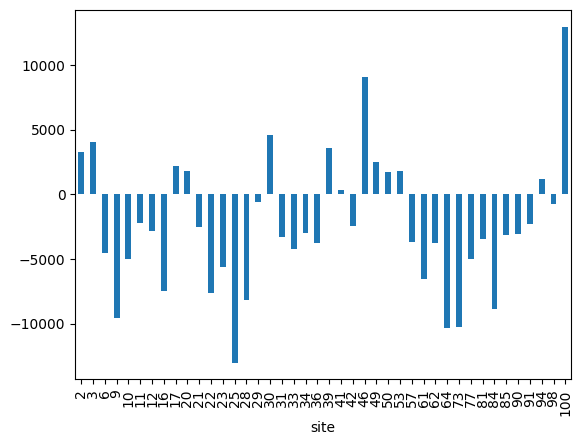

In [19]:
from matplotlib import pyplot as plt

merged_df.groupby('site')['net_load'].sum().plot(kind='bar')

Total Net load per property type for year = 2019, month = 7, day =12

<Axes: xlabel='property_type'>

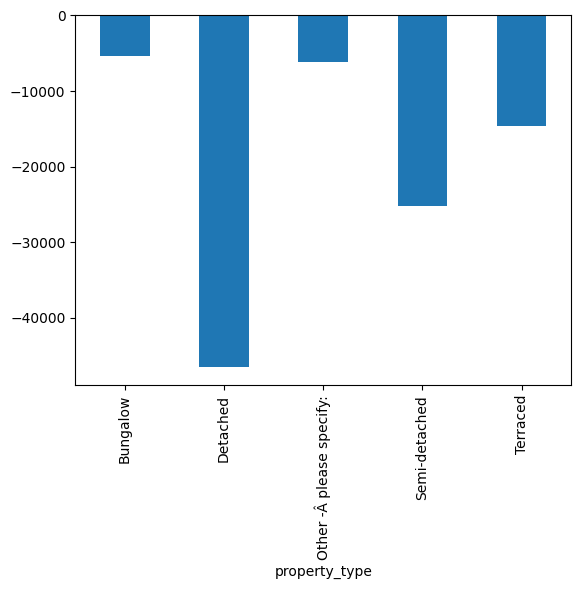

In [20]:
merged_df.groupby('property_type')['net_load'].sum().plot(kind='bar')

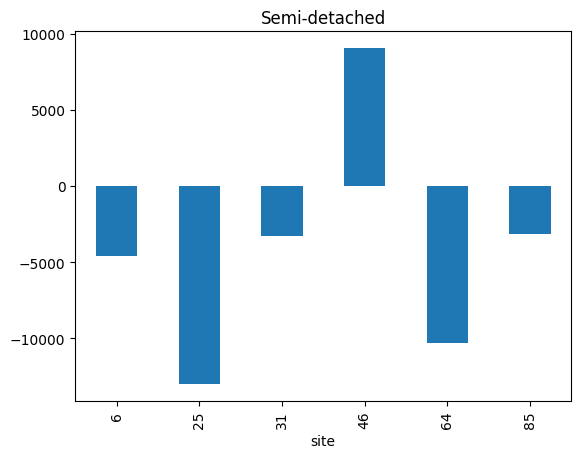

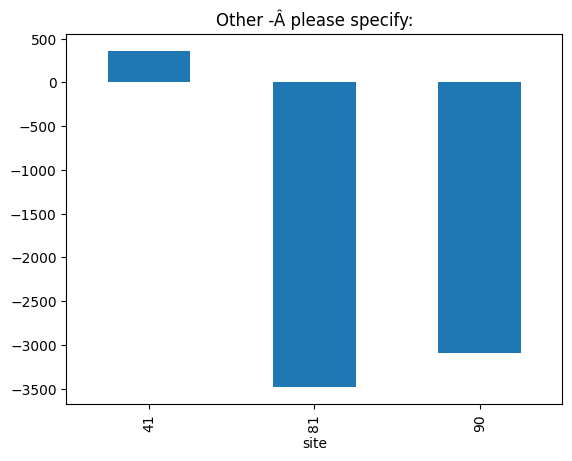

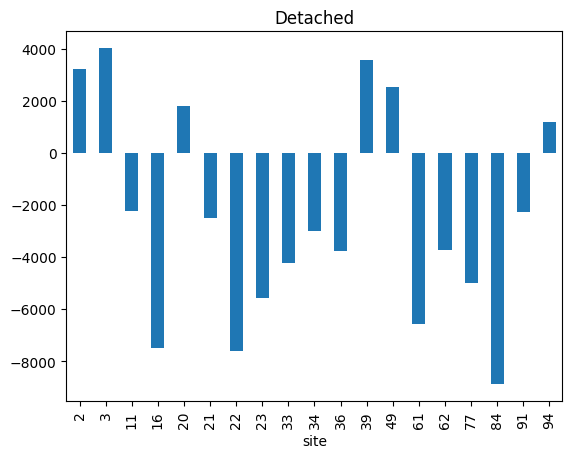

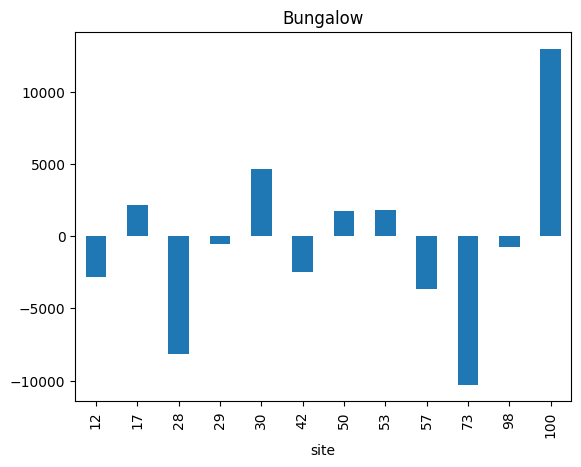

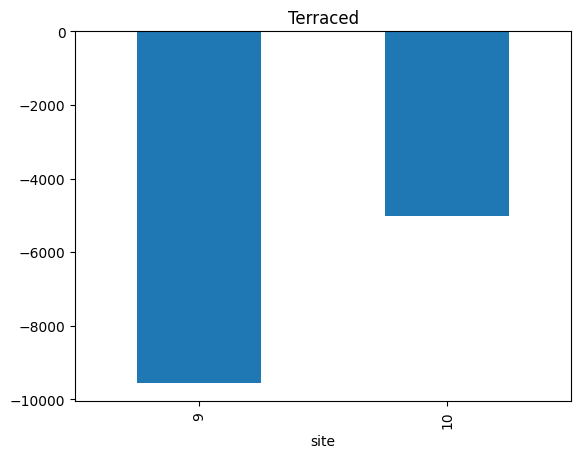

In [21]:
prop_types = merged_df.property_type.unique()
for prop in prop_types:
    merged_df.loc[merged_df.property_type == prop].groupby('site')['net_load'].sum().plot(kind='bar', title=prop)
    plt.show()

In [22]:
merged_df.current_supplier.value_counts()

current_supplier
Other - please specify below:    1056
Scottish Power                    672
EON                               576
British Gas                       480
EDF                               384
Good Energy                       384
Ovo                               192
SSE                               192
Ecotricity                         96
Name: count, dtype: int64

In [23]:
query_big="""
    select * 
    from agg.t_msb1m
"""
df_big = pd.read_sql_query(query_big, conn)

C:\Users\Zóra\AppData\Local\Temp\ipykernel_26024\3346490833.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_big = pd.read_sql_query(query_big, conn)


In [24]:
df_big.shape

(1599362, 22)

In [25]:
df_big.year.value_counts()

year
2019    1232925
2020     366437
Name: count, dtype: int64

Merging t_msb1m (df_big) with t_meta_data_wide_format (df_meta)

Adding Net load variable
Rename min to minute

In [26]:
merged_meta = df_big.merge(df_meta, left_on='site', right_on='site')
merged_meta['net_load'] = merged_meta['consumption_wh'] + merged_meta['charge_wh'] - merged_meta['discharge_wh'] - merged_meta['production_wh']
#merged_meta = merged_meta.rename(columns={'min': 'minute'})
# Got to rename because 'min' messes it up
merged_meta.rename(columns={'min': 'minute'}, inplace=True)

merged_meta.insert(6, 'datetime', pd.to_datetime(merged_meta[['year', 'month', 'day', 'hour', 'minute']]))

merged_meta

,site,year,month,day,hour,minute,datetime,tz,soc,discharge_wh,charge_wh,production_wh,consumption_wh,gridexport_wh,gridimport_wh,pvcharge_wh,pvcons_wh,pvexport_wh,griddischarge_wh,gridcharge_wh,gridcons_wh,consdischarge_wh,mismatch_wh,newsite,postcode_x,responsible_person,payment_method,avg_monthly_electricity_bill,electricity_bills_shared,current_supplier,installed_smart_meter,no_resident_adults_16_plus,no_resident_adults_over_65,no_resident_children_under_16,weekday_morning_evening,someone_home_all_day,continuous_electricity_supply,household_annual_income,property_type,approx_year_of_build,property_in_conservation_area,conservation_area_details,property_heat_source,economy7_off_peak_meter,economy7_storage_heaters,no_of_storage_heaters,renewable_technology_installed,renewable_source_1,renewable_source_2,renewable_source_3,renewable_source_4,renewable_source_5,renewable_source_6,renewables_installed_g83_g59,reason_for_renewable_technology,electrical_appliances_home,electrical_appliances_home_1,electrical_appliances_home_2,electrical_appliances_home_3,electrical_appliances_home_4,electrical_appliances_home_5,electrical_appliances_home_6,electrical_appliances_home_7,electrical_appliances_home_8,electrical_appliances_home_9,electrical_appliances_home_10,electrical_appliances_home_11,electrical_appliances_home_12,electrical_appliances_home_13,electrical_appliances_home_14,electrical_appliances_home_15,electrical_appliances_home_16,electrical_appliances_home_17,electrical_appliances_home_18,electric_vehicle_owned,ev_vehicle_make,main_uses_ev_1,main_uses_ev_2,main_uses_ev_3,approx_no_of_trips_per_day,approx_no_of_trips_per_week,average_weekly_mileage_ev,dedicated_ev_charger,fuse_box_location,broadband_always_on,broadband_download_speed,broadband_upload_speed,router_has_ethernet_sockets,no_of_ethernet_sockets,powerline_ethernet_adapters,powerline_ethernet_adapters_1,roof_direction,roof_shaded,pitched_roof,property_has_garage,garage_dimensions_for_battery,no_garage_battery_dimensions,motivations_for_participating_1,motivations_for_participating_2,motivations_for_participating_3,motivations_for_participating_4,motivations_for_participating_5,motivations_for_participating_6,postcode_y,dwelling_type_1,dwelling_type_2,floor_area,walls,roof,glazing,heating_type,heating_fuel,controls,hot_water,besstype,besskwh,besskw,pvkw,postcode,majorload,net_load
0,84,2019,11,1,11,0,2019-11-01 11:00:00,UTC+00:00,2.0,0.0,72.59,82.39,17.97,0.0,8.17,64.42,17.97,0.0,0.0,8.17,0.0,0.0,0.0,84,TR4,Yes,On receipt of bill,NaN,Yes,Scottish Power,No,2,1.0,0.0,Often,Yes,Yes,"25,001 - 45,000",Detached,Brand New,No,None,Mains gas,None,None,NaN,No - please go on to Question 29,None,None,None,None,None,None,None,None,Fridge,Freezer,Microwave,Oven,Toaster,Kettle,Dishwasher,Washing Machine,TV,Digital / Sky box / Apple TV,None,Stereo,None,Tablet,None,None,None,Vaccuum,Electric car,Yes,Nissan Leaf,None,Shopping,Leisure,1.0,7.0,50.0,Yes,Downstairs cloakroom,Yes,42.66,9.34,Yes,4.0,No,NaN,North to South,No,Yes,Yes,Yes,None,4.0,6.0,5.0,2.0,3.0,1.0,TR4,detached,house,113.0,0.26,0.11,high performance glazing,boiler,mains gas,Programmer RT & TRV,main system,Hybrid9.53,7.5,3.3,3.42,TR4,None,8.17
1,84,2019,11,1,11,15,2019-11-01 11:15:00,UTC+00:00,3.0,0.0,77.65,87.68,17.16,0.0,7.13,70.52,17.16,0.0,0.0,7.13,0.0,0.0,0.0,84,TR4,Yes,On receipt of bill,NaN,Yes,Scottish Power,No,2,1.0,0.0,Often,Yes,Yes,"25,001 - 45,000",Detached,Brand New,No,None,Mains gas,None,None,NaN,No - please go on to Question 29,None,None,None,None,None,None,None,None,Fridge,Freezer,Microwave,Oven,Toaster,Kettle,Dishwasher,Washing Machine,TV,Digital / Sky box / Apple TV,None,Stereo,None,Tablet,None,None,None,Vaccuum,Electric car,Yes,Nissan Leaf,None,Shopping,Leisure,1.0,7.0,50.0,Yes,Downstairs cloakroom,Yes,42.66,9.34,Yes,4.0,No,NaN,North to South,No,Yes,Yes,Yes,None,4.0,6.0,5.0,2.0,3.0,1.0,TR4,detached,house,113.0,0.26,0.11,high performance glazing,boiler,mains gas,Programmer RT & TRV,main system,Hybrid9.53,7.5,3.3,

In [27]:
print(merged_meta)

         site  year  month  day  hour  minute            datetime         tz  \
0          84  2019     11    1    11       0 2019-11-01 11:00:00  UTC+00:00   
1          84  2019     11    1    11      15 2019-11-01 11:15:00  UTC+00:00   
2          84  2019     11    1    11      30 2019-11-01 11:30:00  UTC+00:00   
3          84  2019     11    1    11      45 2019-11-01 11:45:00  UTC+00:00   
4          84  2019     11    1    12       0 2019-11-01 12:00:00  UTC+00:00   
...       ...   ...    ...  ...   ...     ...                 ...        ...   
1599357    84  2019     11    1     9      45 2019-11-01 09:45:00  UTC+00:00   
1599358    84  2019     11    1    10       0 2019-11-01 10:00:00  UTC+00:00   
1599359    84  2019     11    1    10      15 2019-11-01 10:15:00  UTC+00:00   
1599360    84  2019     11    1    10      30 2019-11-01 10:30:00  UTC+00:00   
1599361    84  2019     11    1    10      45 2019-11-01 10:45:00  UTC+00:00   

         soc  discharge_wh  charge_wh  

In [28]:
columns_to_keep = [
    'site', 'year', 'month', 'day', 'hour', 'minute', 'datetime',
    'discharge_wh', 'charge_wh', 'production_wh', 'consumption_wh',
    'installed_smart_meter', 'no_resident_adults_16_plus', 'no_resident_adults_over_65',
    'no_resident_children_under_16', 'household_annual_income', 'property_type',
    'approx_year_of_build', 'floor_area', 'walls', 'roof', 'glazing', 'net_load'
]
merged_meta_reduced = merged_meta[columns_to_keep].copy()
#merged_meta_reduced.insert(6, 'datetime', pd.to_datetime(merged_meta_reduced[['year', 'month', 'day', 'hour', 'minute']]))

merged_meta_reduced

,site,year,month,day,hour,minute,datetime,discharge_wh,charge_wh,production_wh,consumption_wh,installed_smart_meter,no_resident_adults_16_plus,no_resident_adults_over_65,no_resident_children_under_16,household_annual_income,property_type,approx_year_of_build,floor_area,walls,roof,glazing,net_load
0,84,2019,11,1,11,0,2019-11-01 11:00:00,0.0,72.59,82.39,17.97,No,2,1.0,0.0,"25,001 - 45,000",Detached,Brand New,113.0,0.26,0.11,high performance glazing,8.17
1,84,2019,11,1,11,15,2019-11-01 11:15:00,0.0,77.65,87.68,17.16,No,2,1.0,0.0,"25,001 - 45,000",Detached,Brand New,113.0,0.26,0.11,high performance glazing,7.13
2,84,2019,11,1,11,30,2019-11-01 11:30:00,0.0,87.44,91.06,10.33,No,2,1.0,0.0,"25,001 - 45,000",Detached,Brand New,113.0,0.26,0.11,high performance glazing,6.71
3,84,2019,11,1,11,45,2019-11-01 11:45:00,0.0,91.71,92.24,9.23,No,2,1.0,0.0,"25,001 - 45,000",Detached,Brand New,113.0,0.26,0.11,high performance glazing,8.70
4,84,2019,11,1,12,0,2019-11-01 12:00:00,0.0,46.47,52.42,14.97,No,2,1.0,0.0,"25,001 - 45,000",Detached,Brand New,113.0,0.26,0.11,high performance glazing,9.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1599357,84,2019,11,1,9,45,2019-11-01 09:45:00,0.0,73.56,79.07,17.94,No,2,1.0,0.0,"25,001 - 45,000",Detached,Brand New,113.0,0.26,0.11,high performance glazing,12.43
1599358,84,2019,11,1,10,0,2019-11-01 10:00:00,0.0,21.71,34.07,17.51,No,2,1.0,0.0,"25,001 - 45,000",Detached,Brand New,113.0,0.26,0.11,high performance glazing,5.15
1599359,84,2019,11,1,10,15,2019-11-01 10:15:00,0.0,71.32,69.86,9.40,No,2,1.0,0.0,"25,001 - 45,000",Detached,Brand New,113.0,0.26,0.11,high performance glazing,10.86
1599360,84,2019,11,1,10,30,2019-11-01 10:30:00,0.0,40.17,41.80,9.32,No,2,1.0,0.0,"25,001 - 45,000",Detached,Brand New,113.0,0.26,0.11,high performance glazing,7.69


In [29]:
production_range = merged_meta['production_wh'].agg(['min', 'max'])
consumption_range = merged_meta['consumption_wh'].agg(['min', 'max'])

production_range, consumption_range

(min       0.00
 max    2534.51
 Name: production_wh, dtype: float64,
 min   -1454571.200
 max       5215.779
 Name: consumption_wh, dtype: float64)

Trying to see relationship between production and consumption, and household size and characteristics

In [30]:
# First, ensure all relevant columns are in the correct data type
merged_meta['datetime'] = pd.to_datetime(merged_meta['datetime'])
merged_meta['no_resident_adults_16_plus'] = pd.to_numeric(merged_meta['no_resident_adults_16_plus'], errors='coerce')
merged_meta['no_resident_adults_over_65'] = pd.to_numeric(merged_meta['no_resident_adults_over_65'], errors='coerce')
merged_meta['no_resident_children_under_16'] = pd.to_numeric(merged_meta['no_resident_children_under_16'], errors='coerce')

# Add a column for the total number of occupants
merged_meta['total_occupants'] = (merged_meta['no_resident_adults_16_plus'] +
                         merged_meta['no_resident_adults_over_65'] +
                         merged_meta['no_resident_children_under_16'])

In [31]:
# Resample to hourly consumption
merged_meta.set_index('datetime', inplace=True)
merged_meta_hourly = merged_meta.resample('H').sum()

C:\Users\Zóra\AppData\Local\Temp\ipykernel_26024\2061556758.py:3: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  merged_meta_hourly = merged_meta.resample('H').sum()


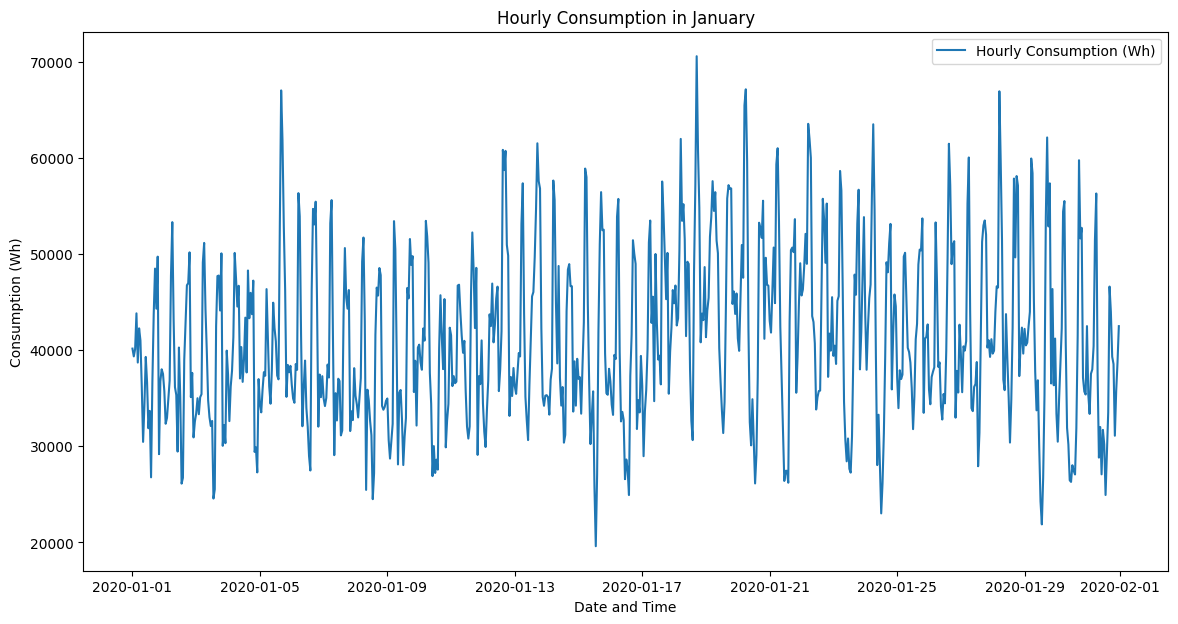

In [32]:
# Now, plot the hourly consumption for a specific moment in the year, for example, January
january_data = merged_meta_hourly[merged_meta_hourly.index.month == 1]
plt.figure(figsize=(14, 7))
plt.plot(january_data['consumption_wh'], label='Hourly Consumption (Wh)')
plt.title('Hourly Consumption in January')
plt.xlabel('Date and Time')
plt.ylabel('Consumption (Wh)')
plt.legend()
plt.show()

In [35]:
query_net_load="""
select TO_TIMESTAMP(CONCAT(year, '-', month, '-', day, ' ', hour), 'YYYY-MM-DD HH24') as ts, site, sum(gridimport_wh-gridexport_wh) as net_load 
from agg.t_msb1m tmm 
group by 1,2
"""
df_main = pd.read_sql_query(query_net_load, conn)





C:\Users\Zóra\AppData\Local\Temp\ipykernel_26024\3248160867.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_main = pd.read_sql_query(query_net_load, conn)


KeyboardInterrupt: 